In [28]:
import cv2
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import Sequential
from tensorflow import keras
import numpy as np

In [2]:
buffalo = os.listdir(os.path.join('animal', 'buffalo'))

In [3]:
img = buffalo[3]
img

'buffalo (101).jpg'

(2101, 2101, 3)


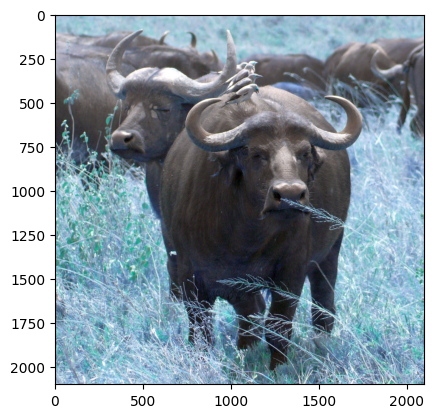

In [4]:
imgs = cv2.imread("animal/buffalo/"+ img)
print(imgs.shape)
plt.imshow(imgs)
plt.show()

In [5]:
train = os.path.join('train')
test = os.path.join('test')
validation = os.path.join('validation')

In [6]:
import albumentations as alb
augmentor = alb.Compose([alb.HorizontalFlip(p=0.5),
                        alb.RandomBrightnessContrast(p=0.2),
                        alb.RandomGamma(p=0.2),
                        alb.RGBShift(p=0.2),
                        alb.VerticalFlip(p=0.5),
                        ])

In [7]:
# for partition in ['train','test','validation']: 
#     for class_name in os.listdir(os.path.join(partition)):
#         for image in os.listdir(os.path.join(partition, class_name)):
#             img = cv2.imread(os.path.join(partition, class_name, image))
#             img = cv2.resize(img, (224,224))
#             try: 
#                 for x in range(5):
#                     augmented = augmentor(image=img)
#                     cv2.imwrite(os.path.join('aug_data', partition, class_name, f'{image.split(".")[0]}_{x}.png'), augmented['image'])
#             except Exception as e:
#                 print(e)

In [8]:
train = os.path.join('aug_data','train')
test = os.path.join('aug_data','test')
validation = os.path.join('aug_data','validation')

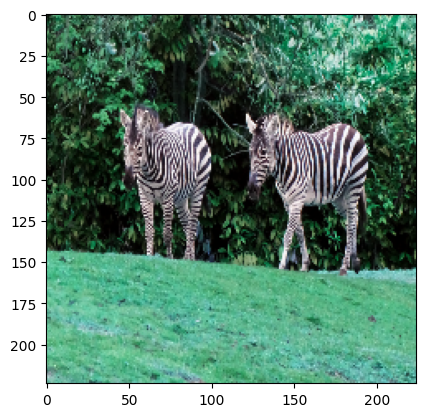

In [9]:
imgs = cv2.imread(r"aug_data\train\zebra\zebra (11)_3.png")
plt.imshow(imgs)
plt.show()

In [10]:
# # Parameters
batch_size = 32

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test,
    target_size = (224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation,
    target_size = (224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 6000 images belonging to 4 classes.
Found 795 images belonging to 4 classes.
Found 720 images belonging to 4 classes.


In [13]:
import tensorflow as tf
import tensorflow_hub as hub

In [14]:
mobilenet_model = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/4"

In [15]:
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [16]:
num_of_classes = 4

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

In [17]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [18]:
batch_size = 32

In [22]:
hist = model.fit(train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 3,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size
)

Epoch 1/3
187/187 [==============================] - 108s 580ms/step - loss: 0.1808 - acc: 0.9367 - val_loss: 0.1780 - val_acc: 0.9389
Epoch 2/3
187/187 [==============================] - 118s 630ms/step - loss: 0.1655 - acc: 0.9430 - val_loss: 0.1478 - val_acc: 0.9489
Epoch 3/3
187/187 [==============================] - 122s 651ms/step - loss: 0.1418 - acc: 0.9455 - val_loss: 0.1317 - val_acc: 0.9474


In [23]:
evaluation = model.evaluate(test_generator)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

25/25 [==============================] - 11s 414ms/step - loss: 0.2047 - acc: 0.9145
Test Loss: 0.20471429824829102
Test Accuracy: 0.9144654273986816


In [25]:
model.save('Animal_spices.h5')

1/1 [==============================] - 0s 35ms/step


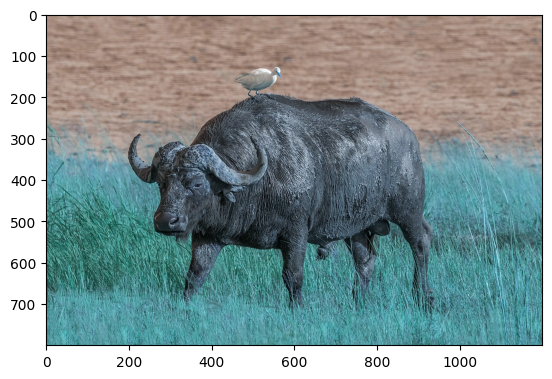

buffalo


In [34]:
img_path = 'image.jpeg'

image = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
image = keras.preprocessing.image.img_to_array(image)
image = image / 255.0
image = image.reshape(1,224,224,3)
pridiction = model.predict(image)

dicts = {0:"Buffalo", 1:"Elephant", 2:"Rhino", 3:"Zebra"}

i = cv2.imread(img_path)
plt.imshow(i)
plt.show()

print(dicts[np.argmax(pridiction)])